## Project 2 : Predictive Analysis on Diabetes

### The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

### About Dataset
**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1)

#### Import the Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv') ## Import the data

In [4]:
df.head() ## Checking the 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe() ## Checking the statistical analysis on Numerical Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info() ## Checking the datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.nunique() ## Checking the number of 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.shape

(768, 9)

### Dividing Categoricam column and continuous column

In [5]:
cat_col = []
con_col = []
for i in df.columns:
    if df[i].nunique()<5:
        cat_col.append(i)
    else:
        con_col.append(i)

In [15]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [6]:
print(cat_col)
print(con_col)

['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Univeriate Analysis for Continuous Columns

### KDE Plot

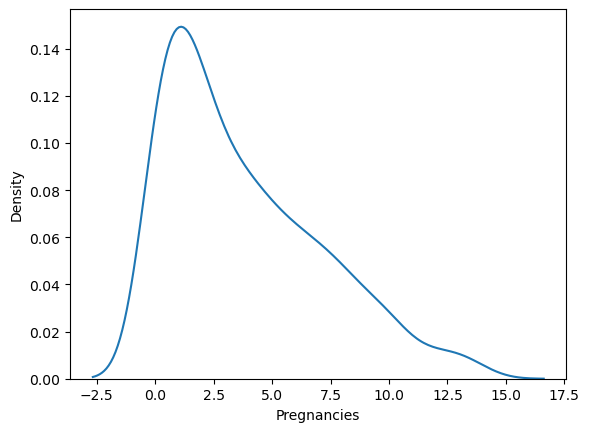

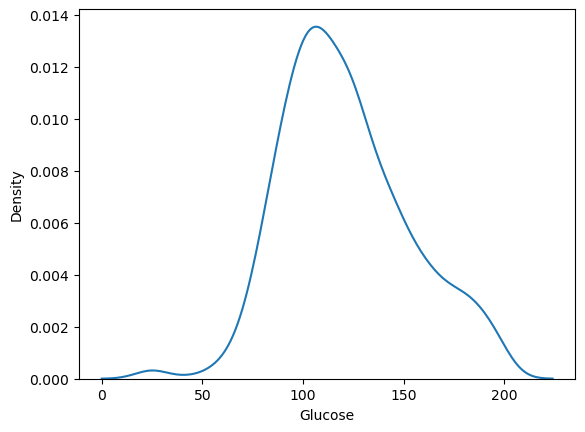

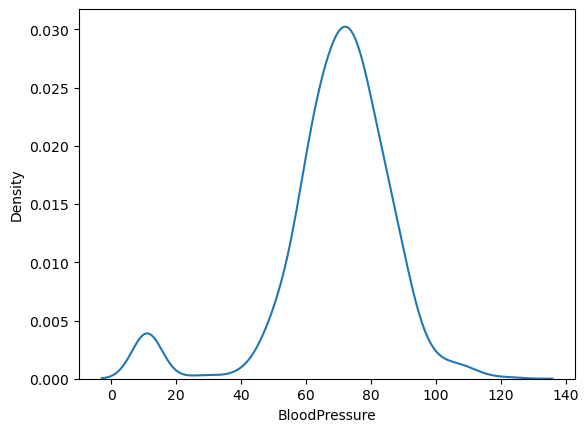

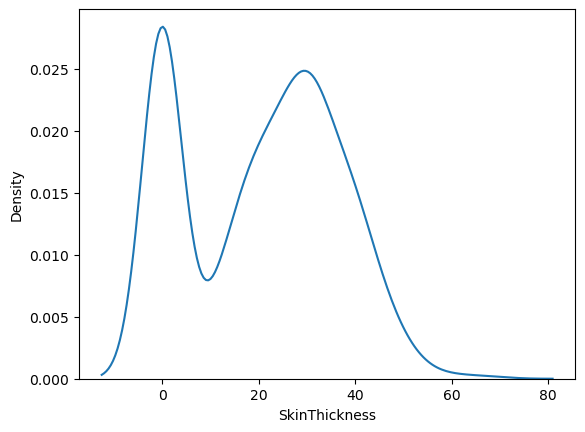

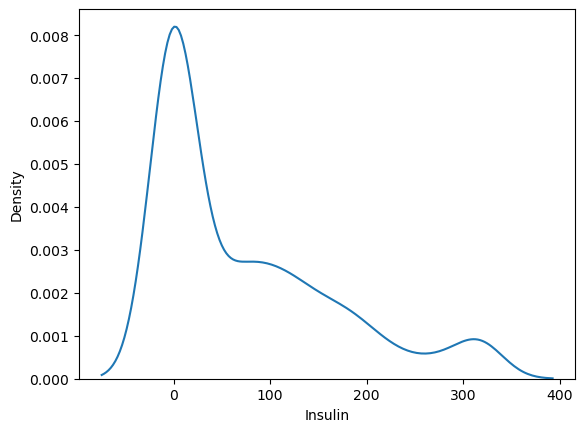

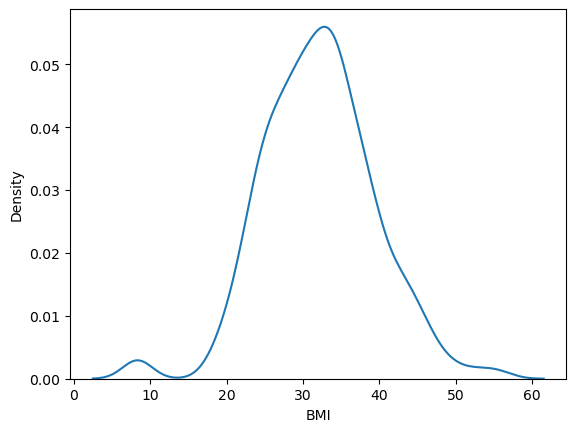

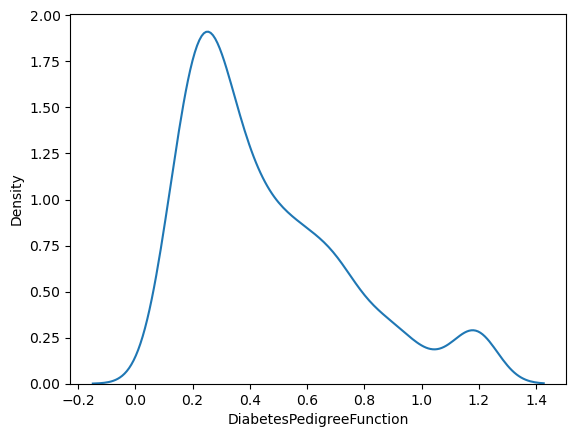

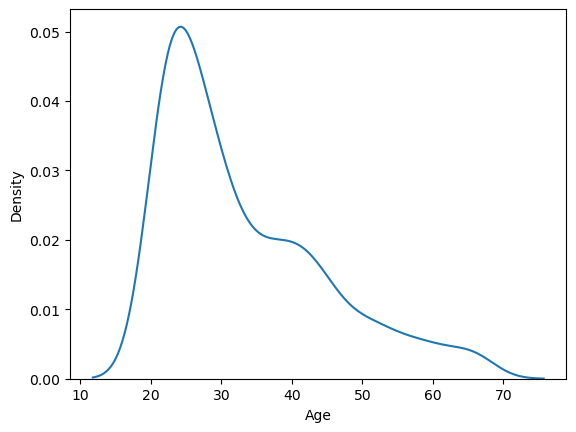

In [7]:
for i in con_col:
    plt.figure()
    sns.kdeplot(data = df, x = i)

### Histogram Plot

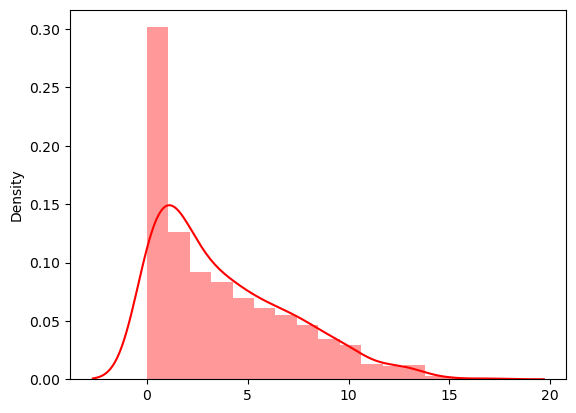

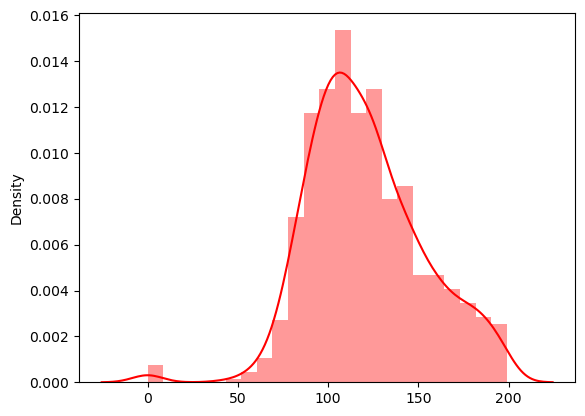

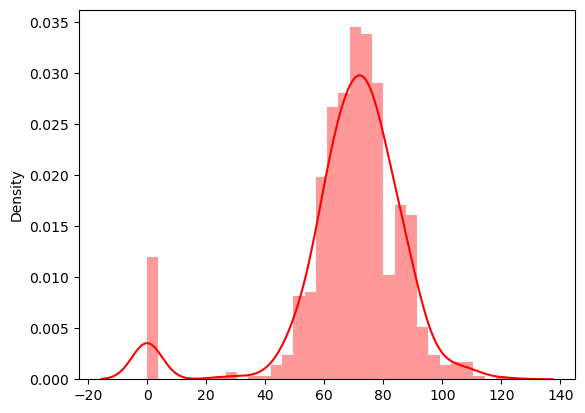

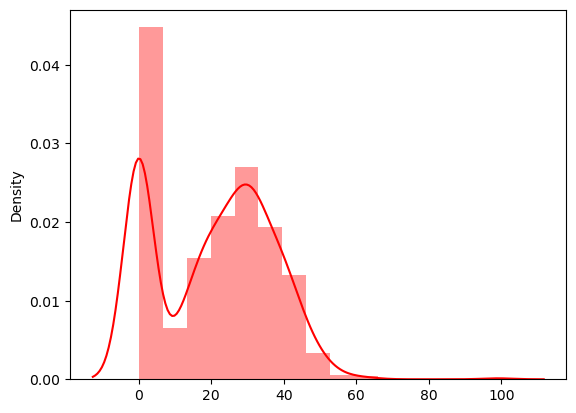

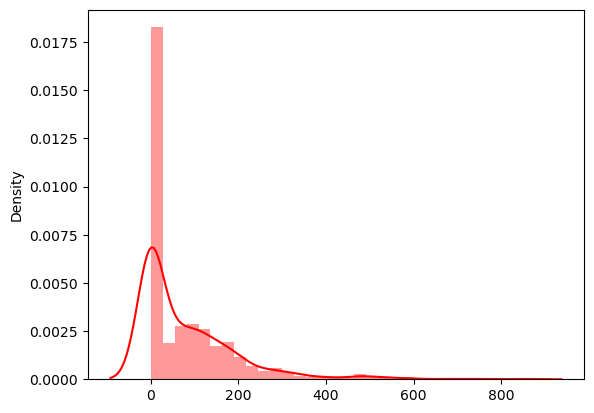

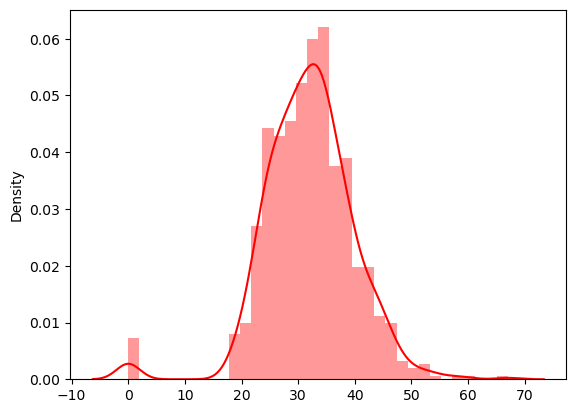

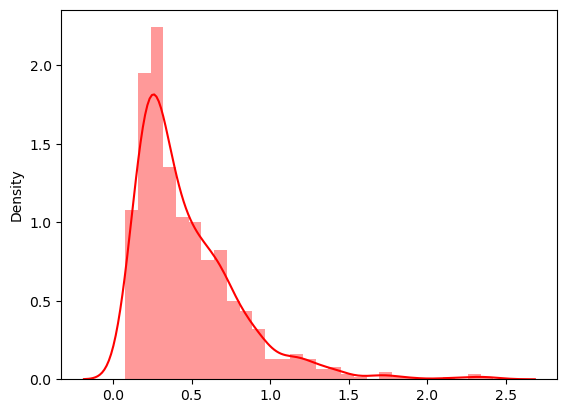

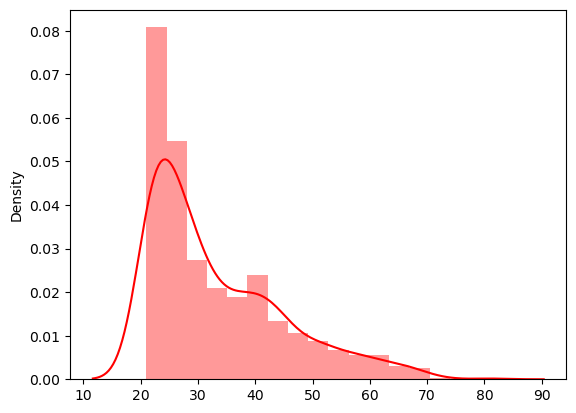

In [25]:
for i in con_col:
    plt.figure()
    sns.distplot(x = df[i],color = 'red')

### BOX Plot

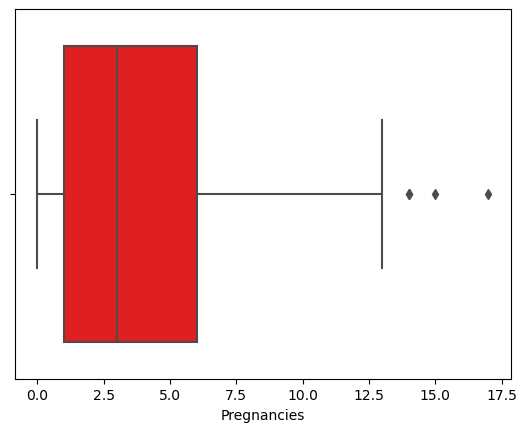

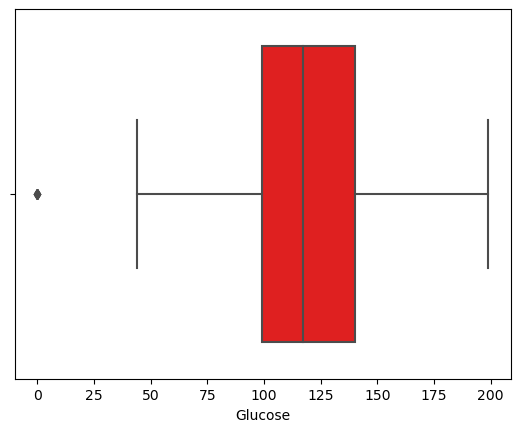

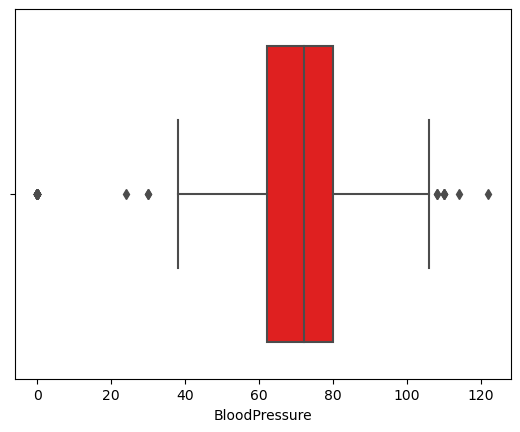

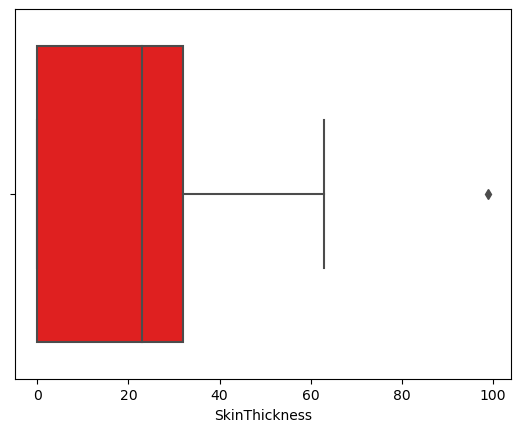

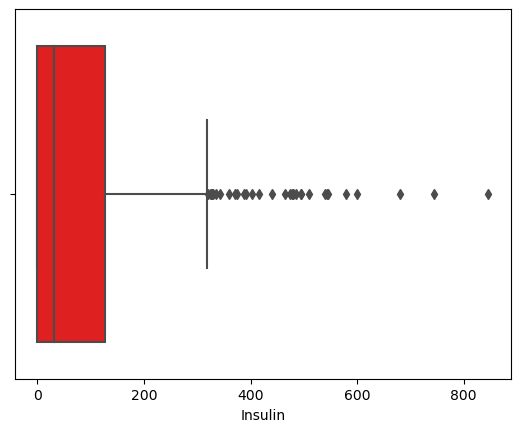

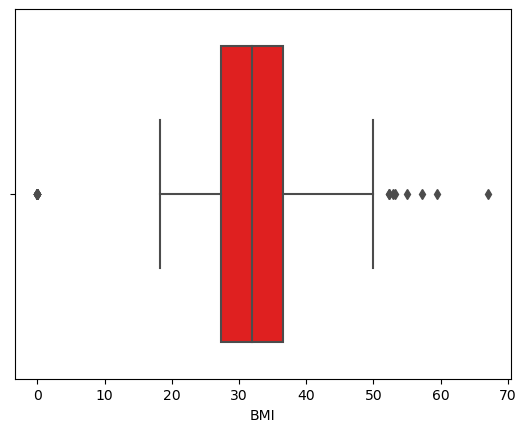

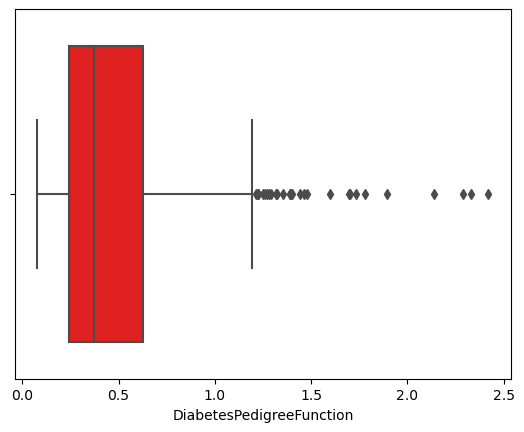

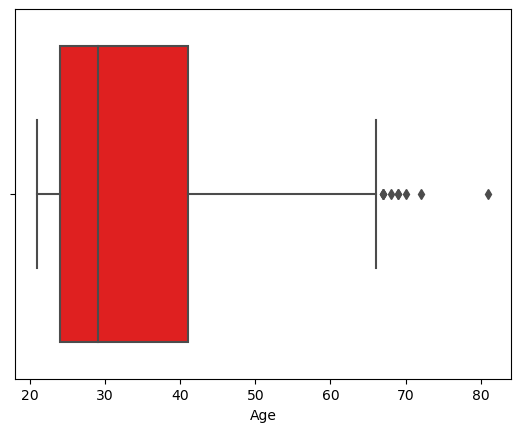

In [26]:
for i in con_col:
    plt.figure()
    sns.boxplot(x = df[i],color = 'red')

### Checking the Skewness

In [33]:
for i in con_col:
    print('Skewness of {} is {}'.format(i,df[i].skew()))

Skewness of Pregnancies is 0.9016739791518588
Skewness of Glucose is 0.17375350179188992
Skewness of BloodPressure is -1.8436079833551302
Skewness of SkinThickness is 0.10937249648187608
Skewness of Insulin is 2.272250858431574
Skewness of BMI is -0.42898158845356543
Skewness of DiabetesPedigreeFunction is 1.919911066307204
Skewness of Age is 1.1295967011444805


### Differentiate the Skewed columns and Normal Columns

In [8]:
normal = []
skewed = []

for i in con_col:
    if np.abs(df[i].skew())>1:
        skewed.append(i)
    else:
        normal.append(i)

In [10]:
### Skewed Columns

['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

### Outlier Treatement

#### IQR Method

In [39]:
def IQR(col):
    
    percentile75 = df[col].quantile(.75)
    percentile25 = df[col].quantile(.25)
    
    IQR = percentile75 - percentile25
    
    upperlimit = percentile75+1.5*IQR
    lowerlimit = percentile25-1.5*IQR
    
    df[col] = np.where(df[col]>upperlimit,upperlimit,np.where(df[col]<lowerlimit,lowerlimit,df[col]))
    

In [40]:
for i in skewed:
    IQR(i)

#### Z-Score Method

In [42]:
def Z_Score(col):
    
    upperlimit = df[col].mean()+3*df[col].std()
    lowerlimit = df[col].mean()-3*df[col].std()

    
    df[col] = np.where(df[col]>upperlimit,upperlimit,np.where(df[col]<lowerlimit,lowerlimit,df[col]))

In [43]:
for i in normal:
    Z_Score(i)

### Again checking for Outliers

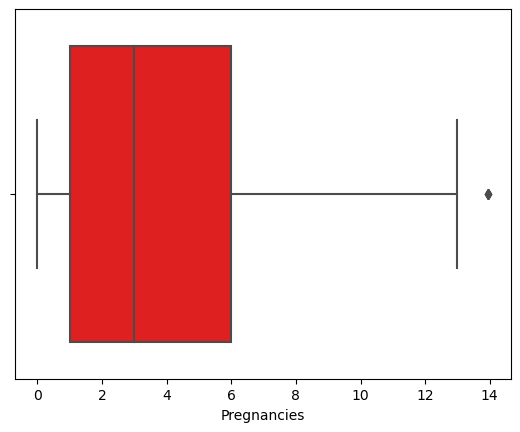

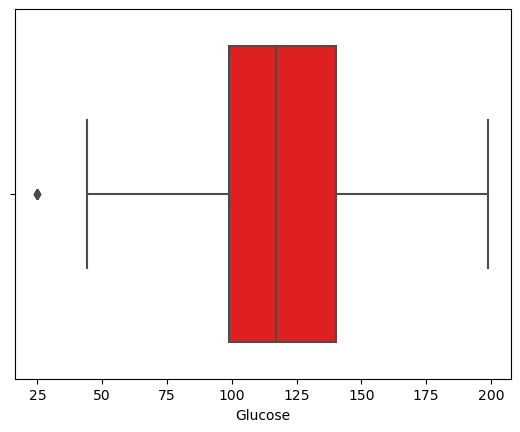

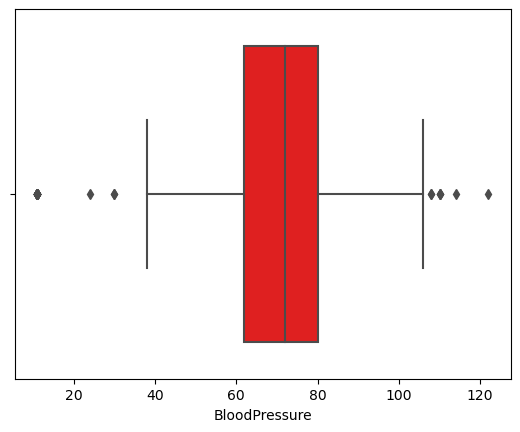

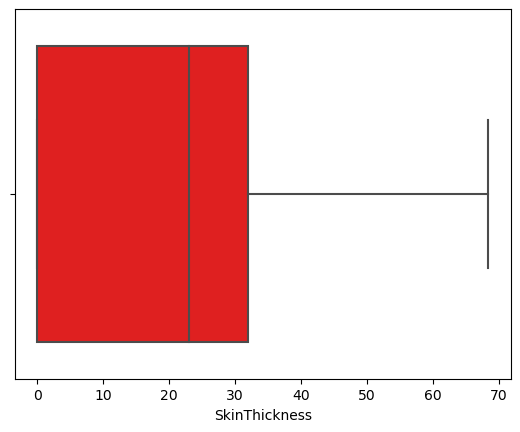

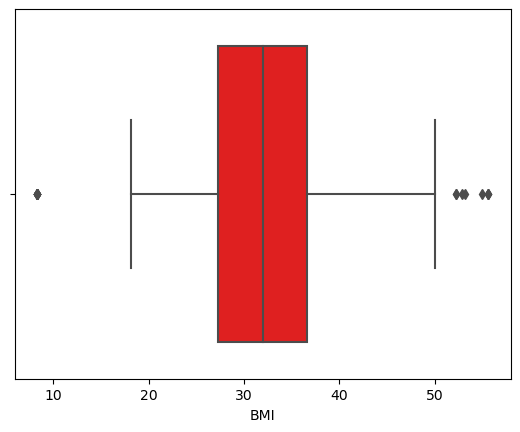

In [44]:
for i in normal:
    plt.figure()
    sns.boxplot(x = df[i],color = 'red')

In [13]:
for i in con_col:
    print('Skewness of {} is {}'.format(i,df[i].skew()))

Skewness of Pregnancies is 0.865009869713941
Skewness of Glucose is 0.3540482090748228
Skewness of BloodPressure is -1.4080419304472231
Skewness of SkinThickness is -0.0036280709808019416
Skewness of Insulin is 1.1738981213083215
Skewness of BMI is 0.004150785742338654
Skewness of DiabetesPedigreeFunction is 1.0244278033317116
Skewness of Age is 1.0671703233262797


In [18]:
print(normal)
print(skewed)

['Pregnancies', 'Glucose', 'SkinThickness', 'BMI']
['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


#### Checking the Function Transformation for Skewed Columns

In [11]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
trans = {
    'LogTransform':FunctionTransformer(func = np.log1p),
    'SquareTransform':FunctionTransformer(func = np.square),
    'SquareRootTransform':FunctionTransformer(func = np.sqrt),
    'Reciprocal':FunctionTransformer(func = lambda x: x**3)
}

LogTransform


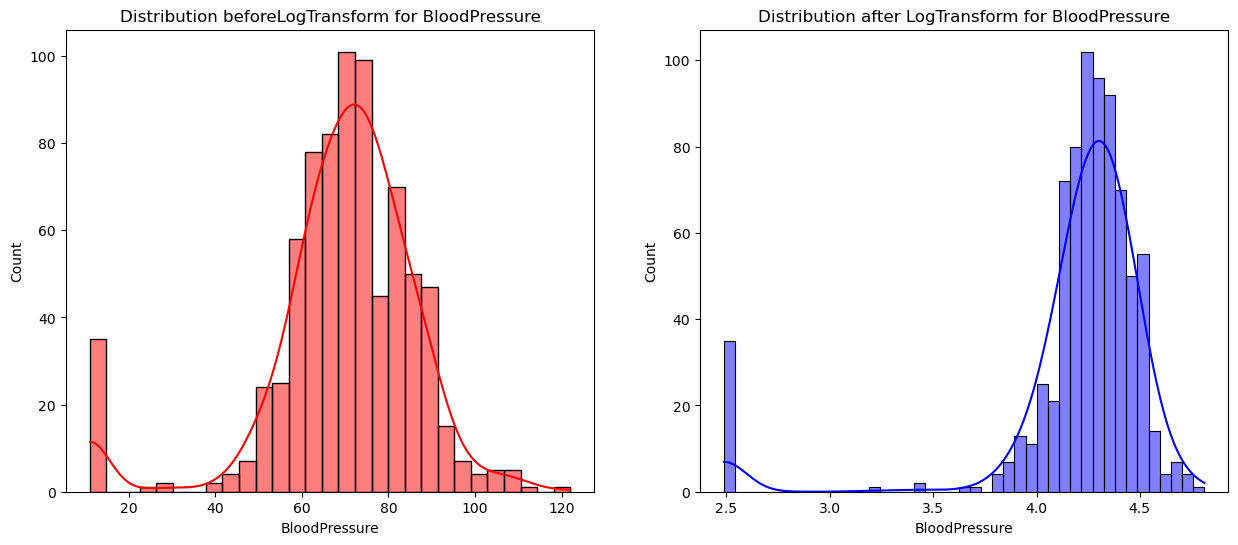

Skewness before LogTransform transformation -1.4080419304472231 and skewness after transformation -3.2282909967048155 for BloodPressure
SquareTransform


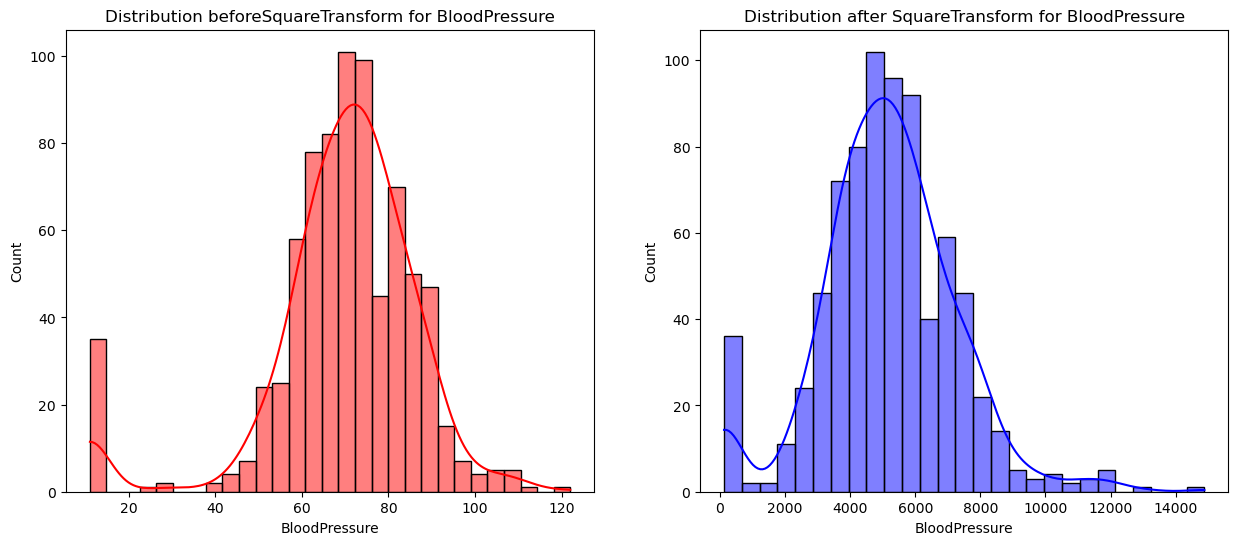

Skewness before SquareTransform transformation -1.4080419304472231 and skewness after transformation 0.1639448307768823 for BloodPressure
SquareRootTransform


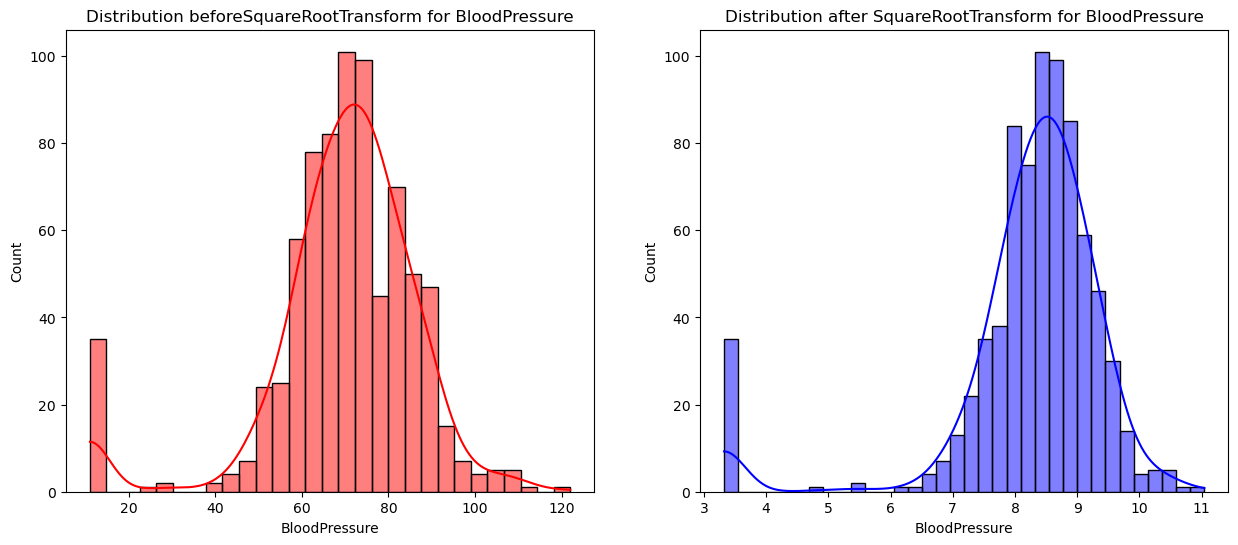

Skewness before SquareRootTransform transformation -1.4080419304472231 and skewness after transformation -2.386626981613445 for BloodPressure
Reciprocal


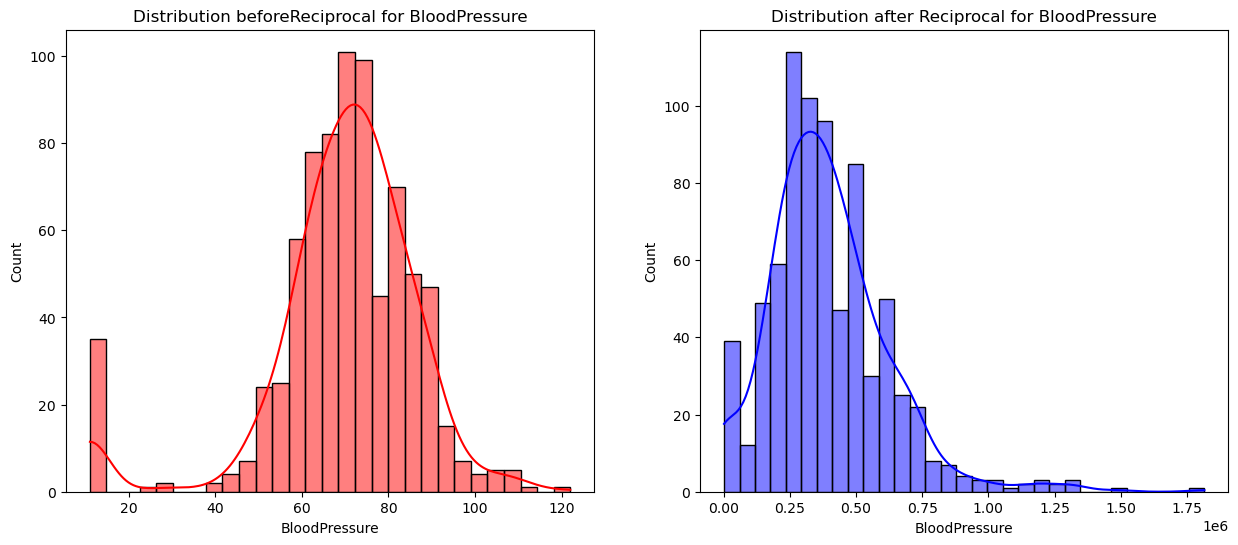

Skewness before Reciprocal transformation -1.4080419304472231 and skewness after transformation 1.2720013343432788 for BloodPressure
LogTransform


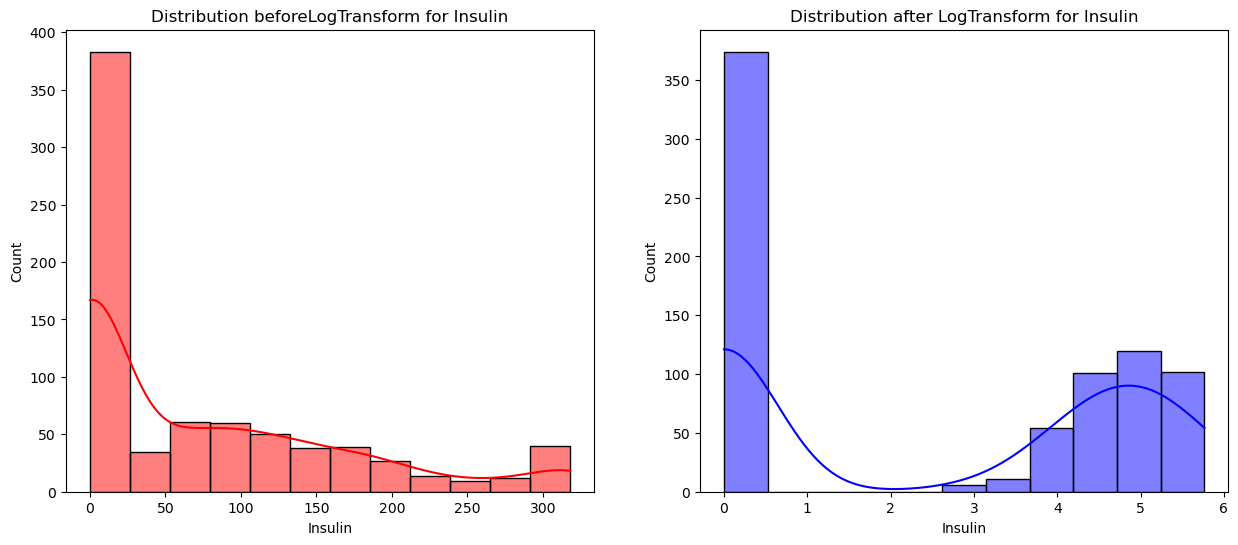

Skewness before LogTransform transformation 1.1738981213083215 and skewness after transformation 0.0474165847127435 for Insulin
SquareTransform


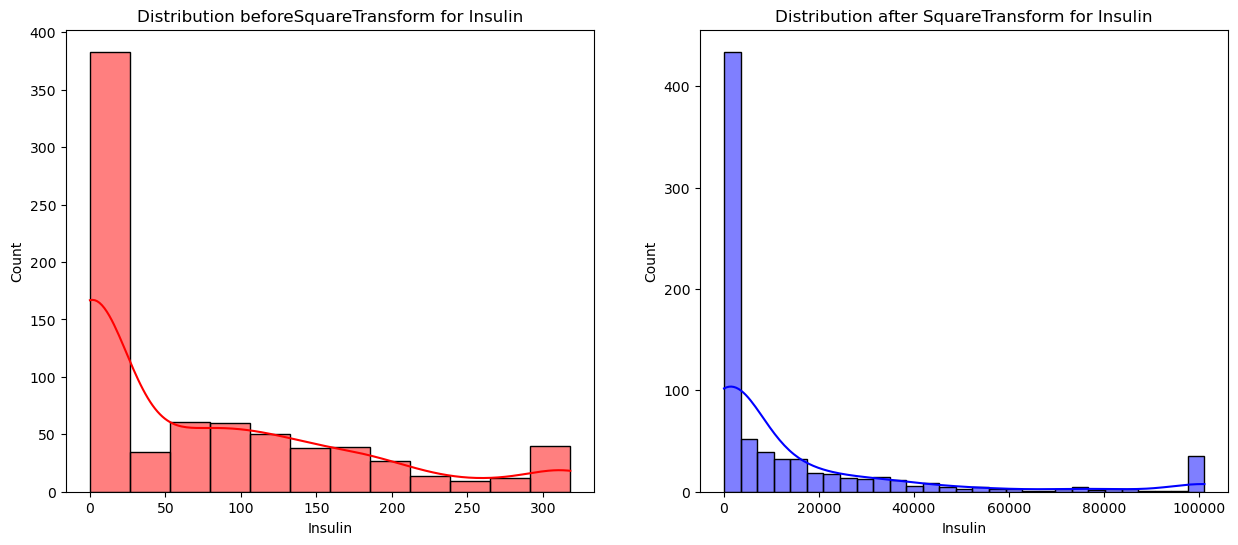

Skewness before SquareTransform transformation 1.1738981213083215 and skewness after transformation 2.30330475077766 for Insulin
SquareRootTransform


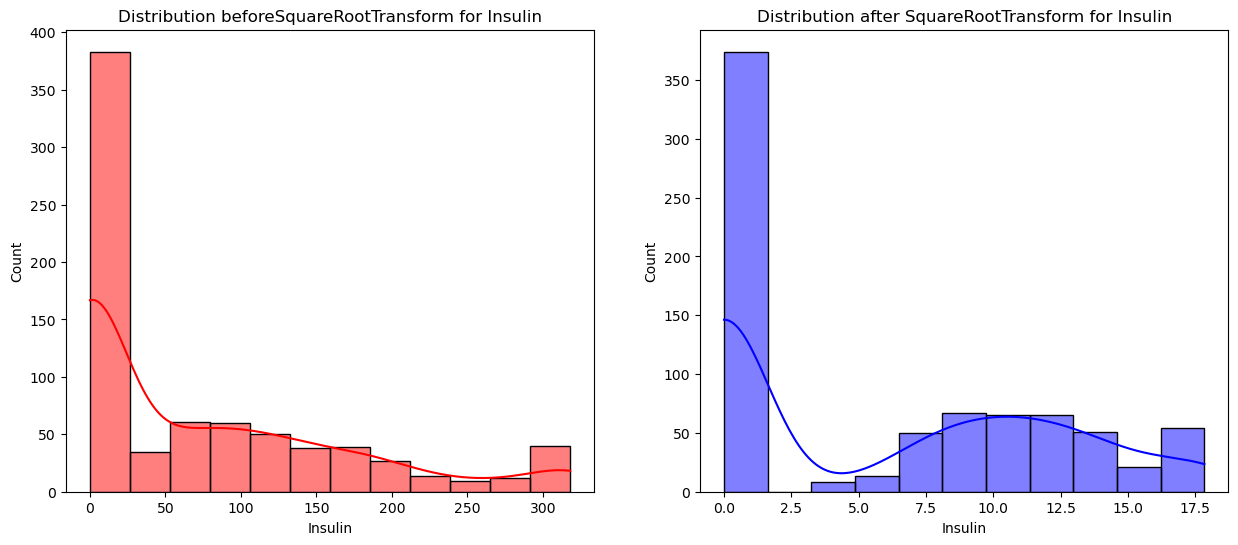

Skewness before SquareRootTransform transformation 1.1738981213083215 and skewness after transformation 0.40775937765715303 for Insulin
Reciprocal


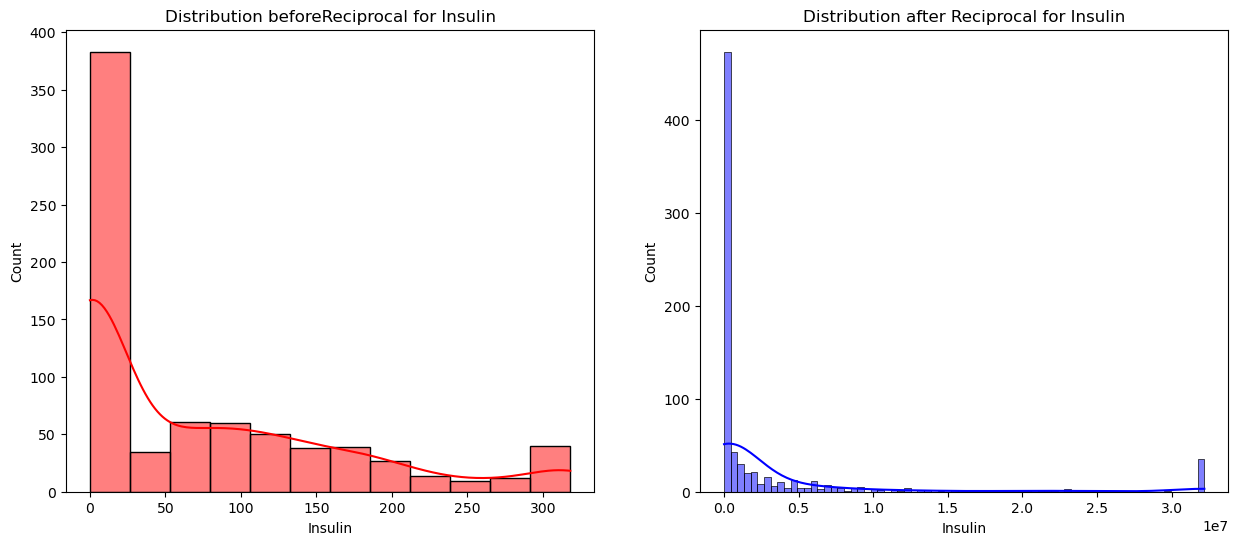

Skewness before Reciprocal transformation 1.1738981213083215 and skewness after transformation 2.927152393548611 for Insulin
LogTransform


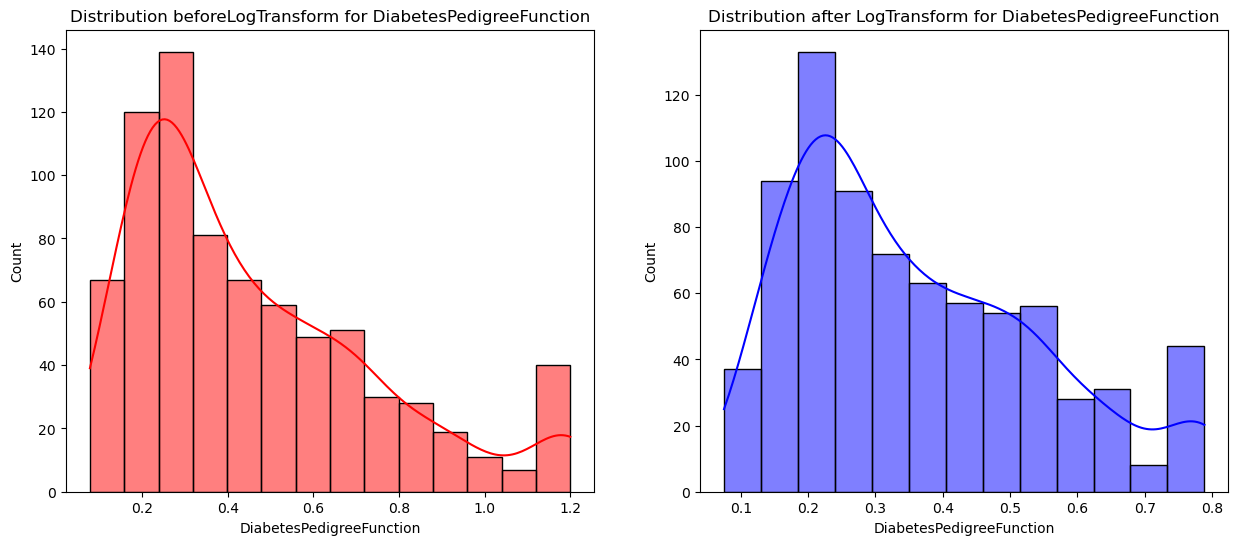

Skewness before LogTransform transformation 1.0244278033317116 and skewness after transformation 0.7037911132710728 for DiabetesPedigreeFunction
SquareTransform


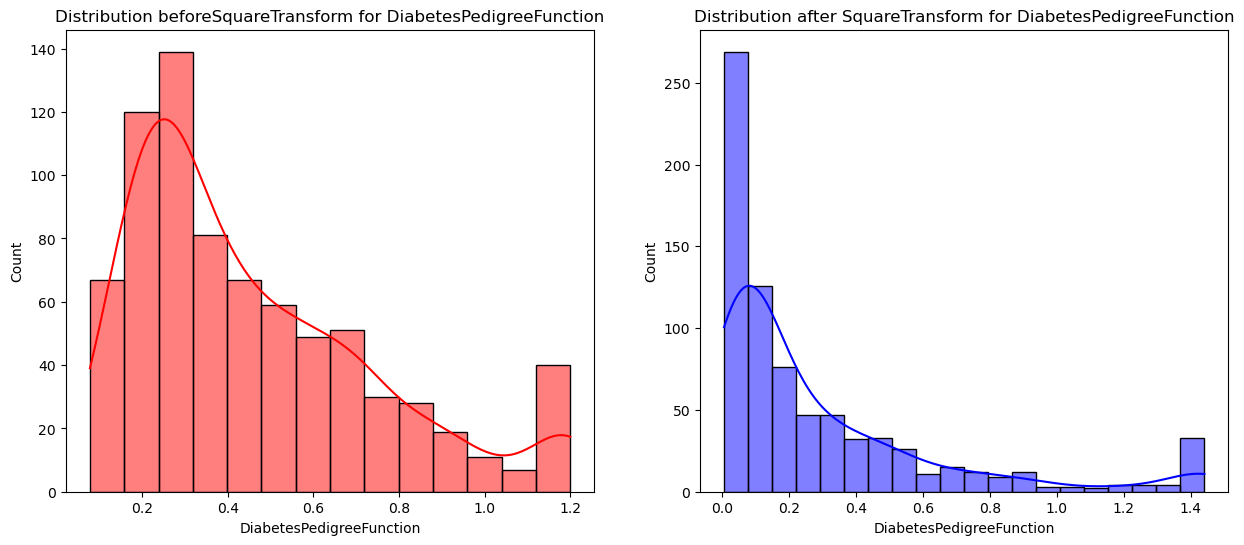

Skewness before SquareTransform transformation 1.0244278033317116 and skewness after transformation 1.901778702502579 for DiabetesPedigreeFunction
SquareRootTransform


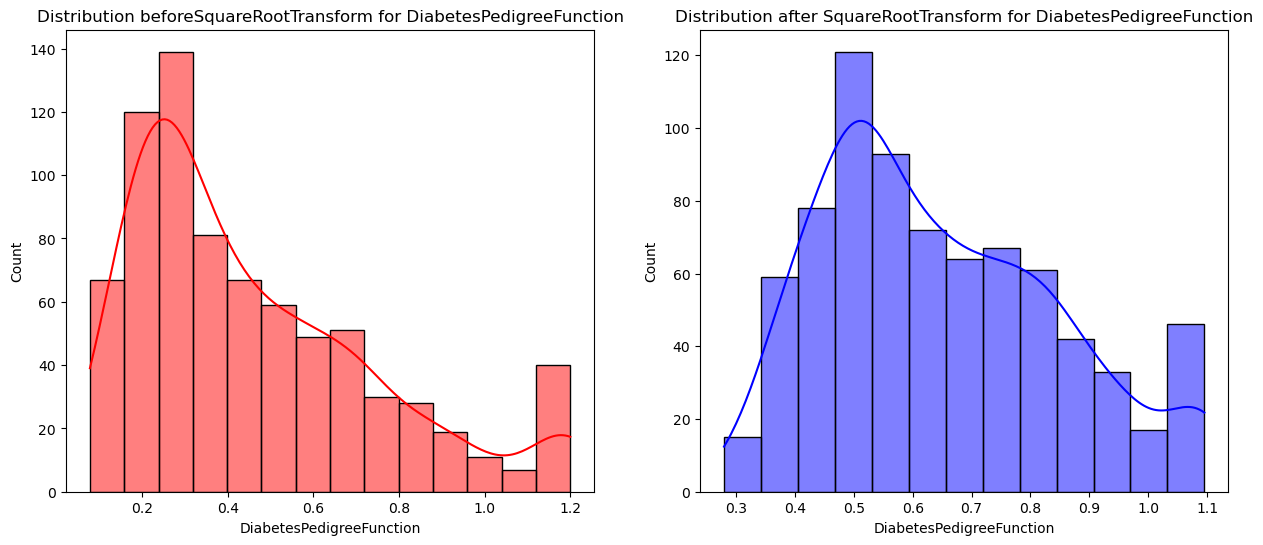

Skewness before SquareRootTransform transformation 1.0244278033317116 and skewness after transformation 0.5215003568506991 for DiabetesPedigreeFunction
Reciprocal


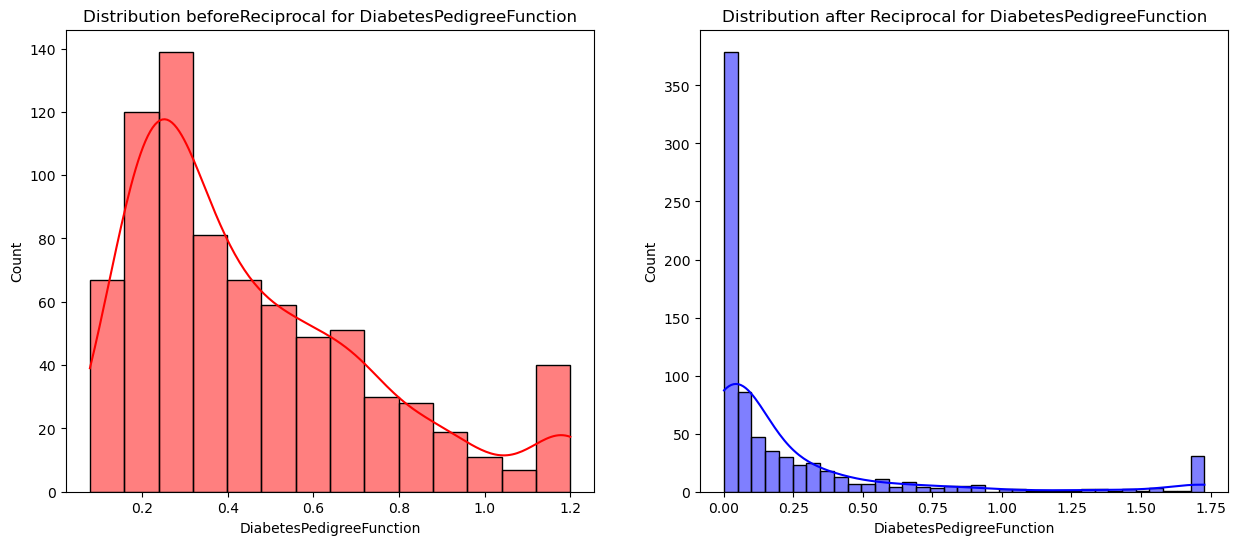

Skewness before Reciprocal transformation 1.0244278033317116 and skewness after transformation 2.564466840296999 for DiabetesPedigreeFunction
LogTransform


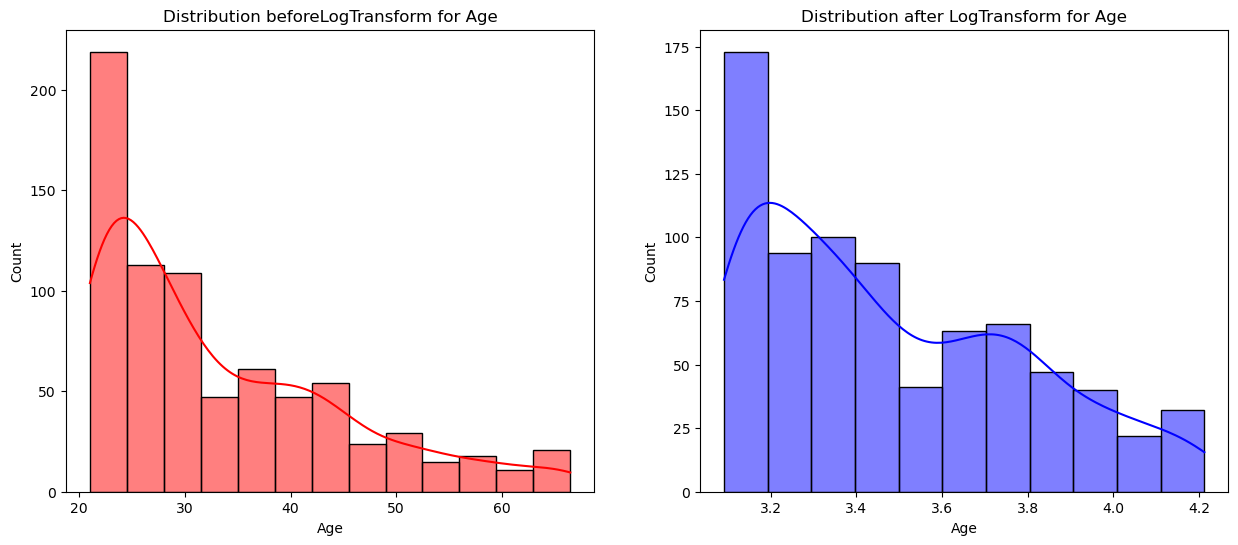

Skewness before LogTransform transformation 1.0671703233262797 and skewness after transformation 0.5933586272376914 for Age
SquareTransform


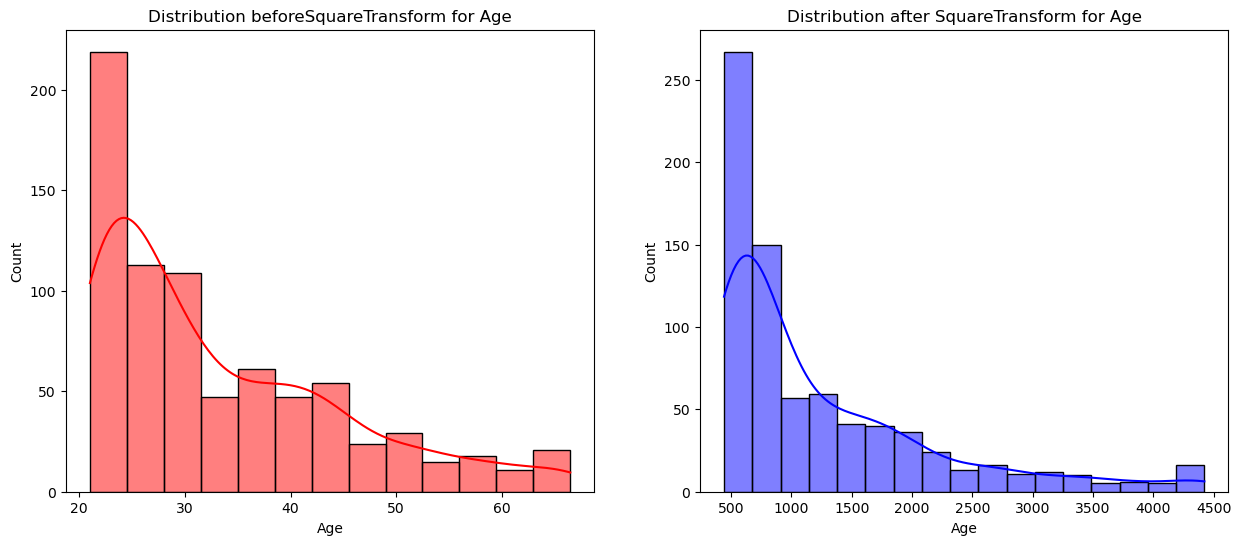

Skewness before SquareTransform transformation 1.0671703233262797 and skewness after transformation 1.6189329465475513 for Age
SquareRootTransform


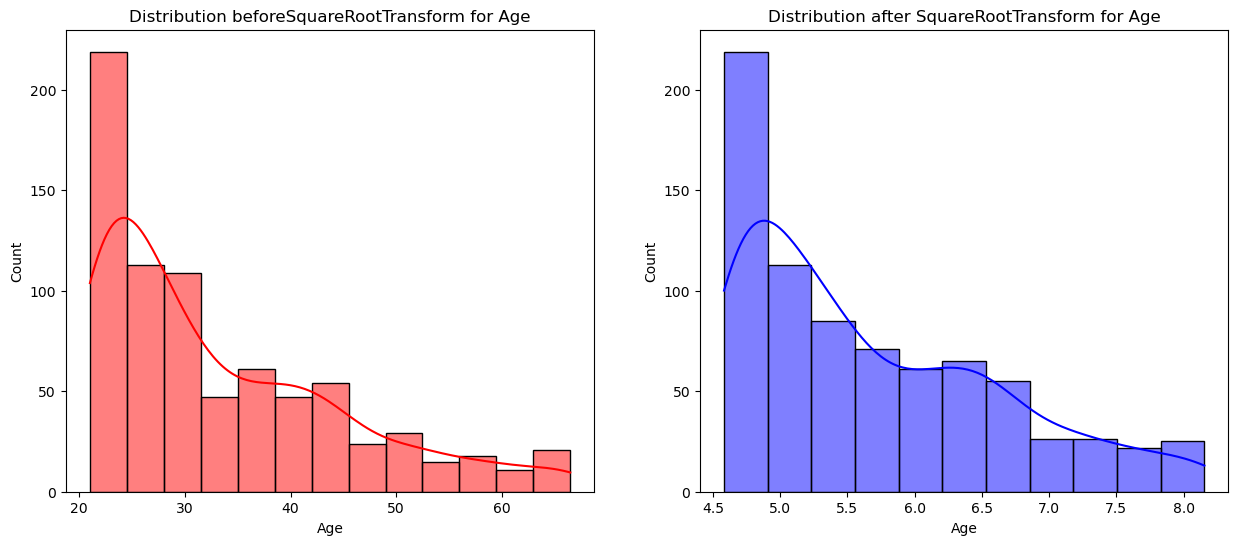

Skewness before SquareRootTransform transformation 1.0671703233262797 and skewness after transformation 0.8141353233726066 for Age
Reciprocal


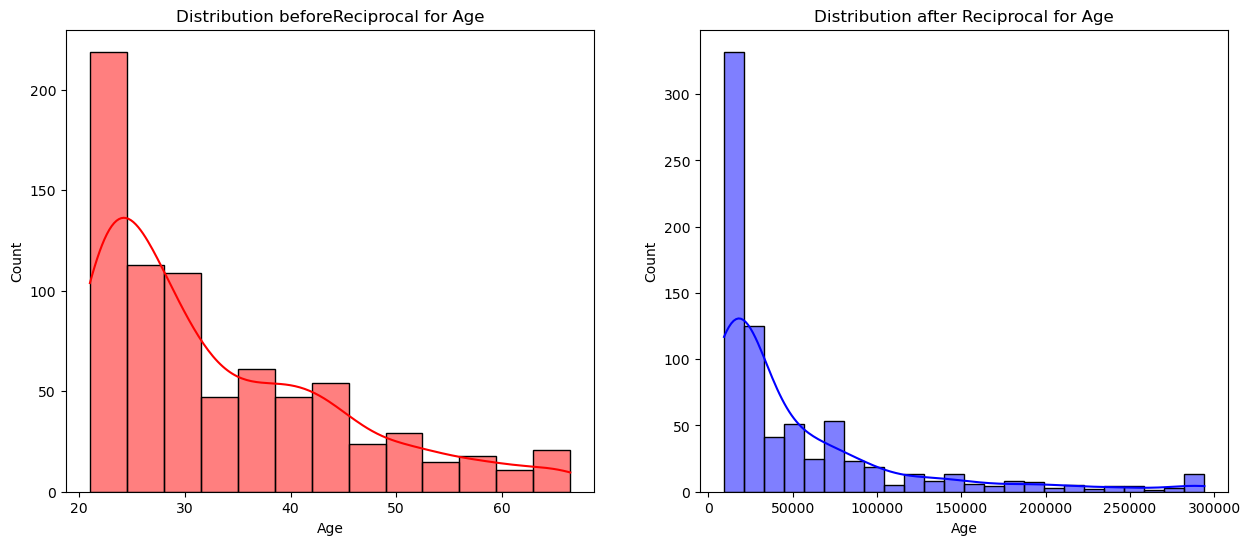

Skewness before Reciprocal transformation 1.0671703233262797 and skewness after transformation 2.1917939119544547 for Age


In [14]:
for j in skewed:
    df1 = df[j]

    for i in trans:
        print(i)
    
        df2 = trans[i].fit_transform(df1)
    
        plt.figure(figsize = (15,6))
        plt.subplot(1,2,1)
        plt.title('Distribution before{} for {}'.format(i,j))
        sns.histplot(df1, kde = True, color = 'red')
    
        plt.subplot(1,2,2)
        plt.title('Distribution after {} for {}'.format(i,j))
        sns.histplot(df2, kde = True, color = 'blue')
        plt.show()
    
    
        print('Skewness before {} transformation {} and skewness after transformation {} for {}'.format(i, df1.skew(),df2.skew(),j))


In [89]:
for j in skewed:
    df1 = df[j]
    for i in trans:
        df2 = trans[i].fit_transform(df1)
        print('skewness after {} transformation is {} for {}'.format(i,df2.skew(),j))

skewness after LogTransform transformation is -3.2282909967048155 for BloodPressure
skewness after SquareTransform transformation is 0.1639448307768823 for BloodPressure
skewness after SquareRootTransform transformation is -2.386626981613445 for BloodPressure
skewness after Reciprocal transformation is 1.2720013343432788 for BloodPressure
skewness after LogTransform transformation is 0.0474165847127435 for Insulin
skewness after SquareTransform transformation is 2.30330475077766 for Insulin
skewness after SquareRootTransform transformation is 0.40775937765715303 for Insulin
skewness after Reciprocal transformation is 2.927152393548611 for Insulin
skewness after LogTransform transformation is 0.7037911132710728 for DiabetesPedigreeFunction
skewness after SquareTransform transformation is 1.901778702502579 for DiabetesPedigreeFunction
skewness after SquareRootTransform transformation is 0.5215003568506991 for DiabetesPedigreeFunction
skewness after Reciprocal transformation is 2.56446684

* **On the basis of above skewness value for all transformation we are selecting LogTransformation**

### Univeriate Analysis for Categorical Column

In [90]:
cat_col

['Outcome']

### Count Plot

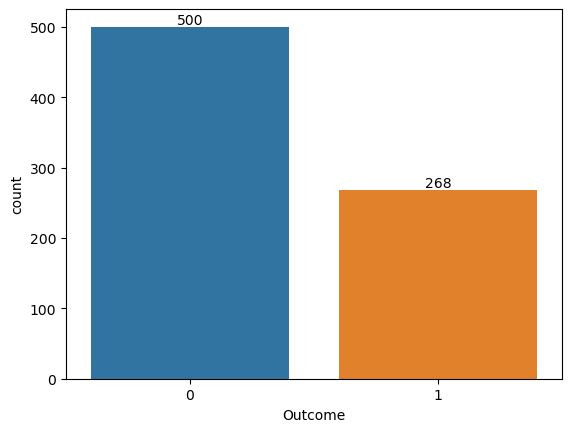

In [16]:
ax = sns.countplot(data = df, x = 'Outcome')

for i in ax.containers:
    ax.bar_label(i)


### Biveriate Analysis with Target Columns Outcome

### KDE Plot

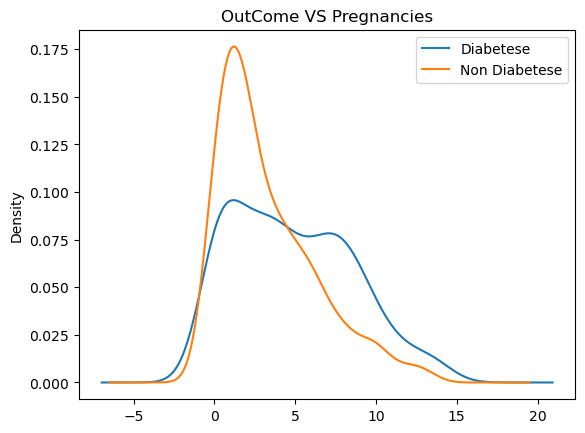

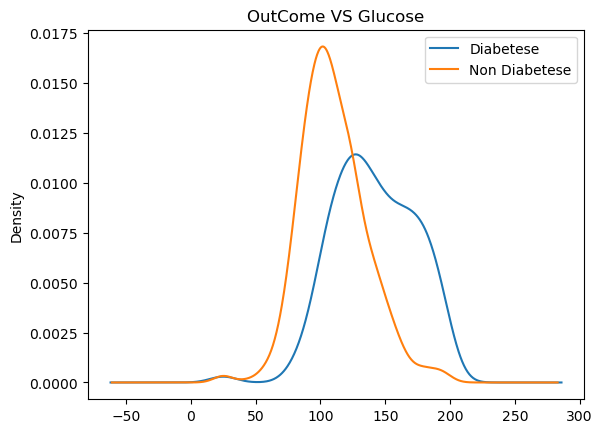

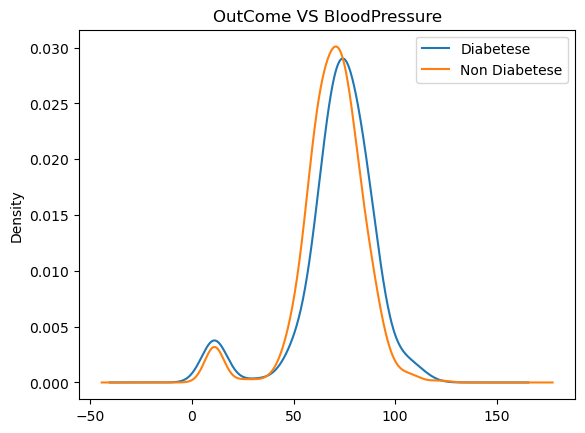

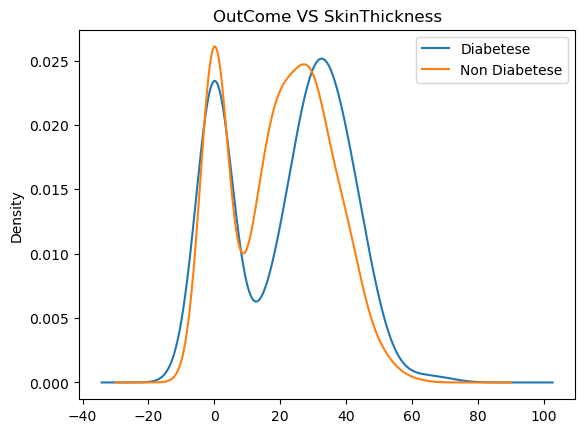

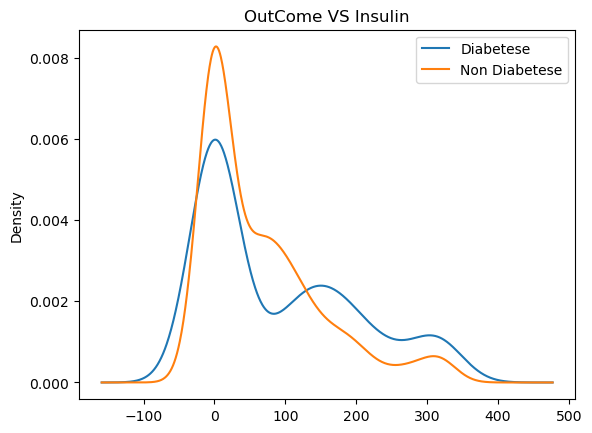

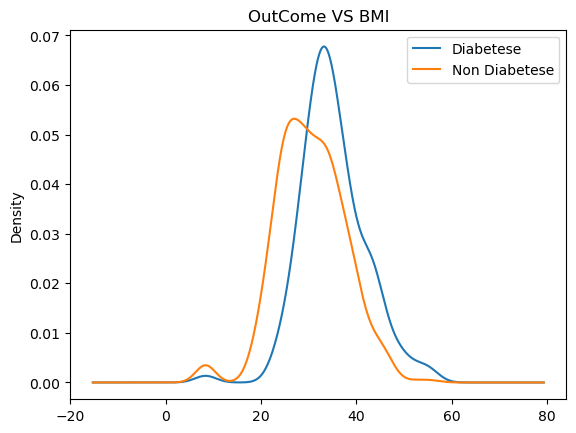

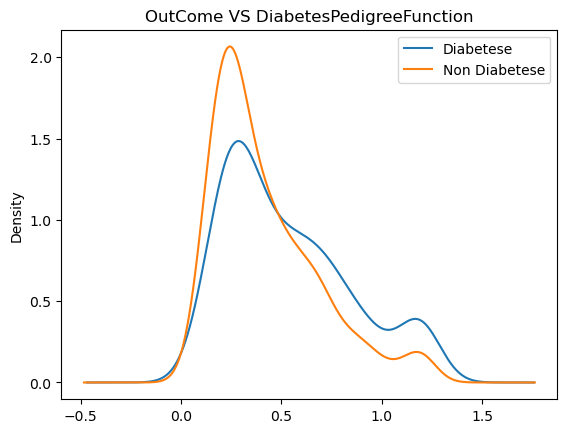

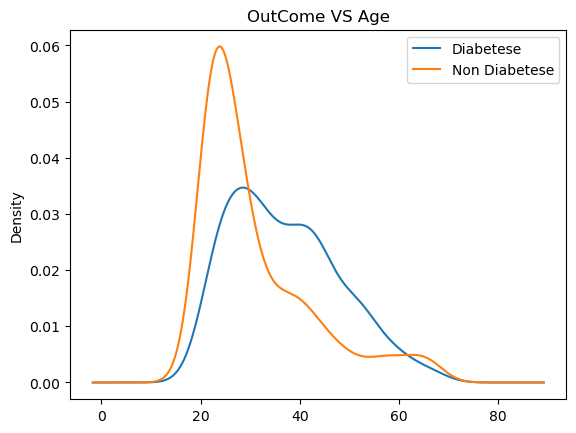

In [15]:

for i in con_col:
    plt.figure()
    df[df['Outcome']==1][i].plot(kind = 'kde', label = 'Diabetese')
    df[df['Outcome']==0][i].plot(kind = 'kde',label = 'Non Diabetese')
    plt.legend()
    plt.title('OutCome VS '+i)

### Violin Plot

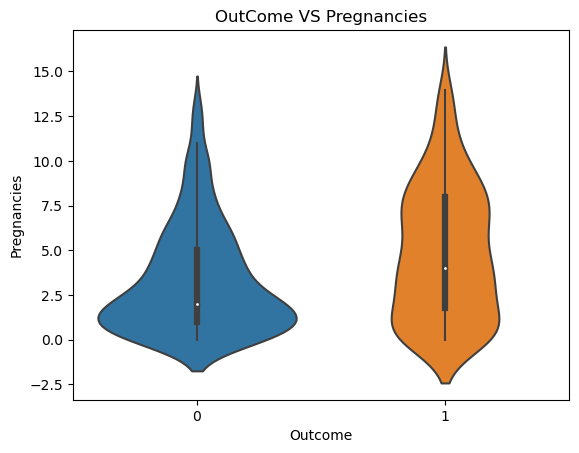

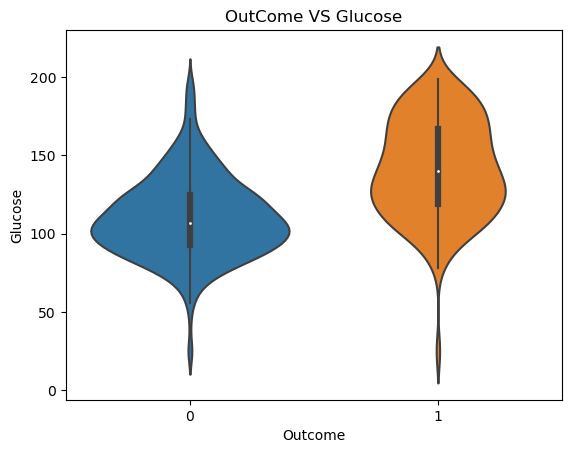

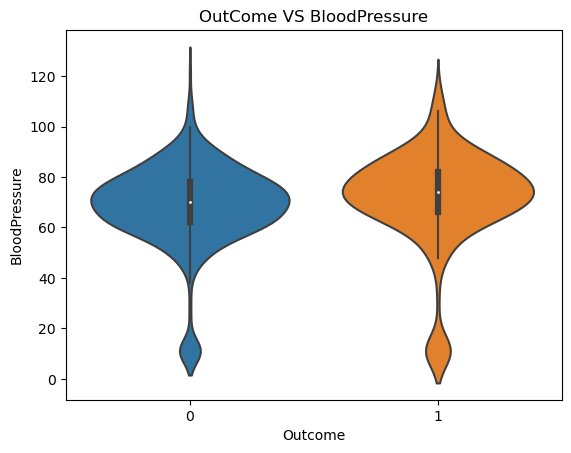

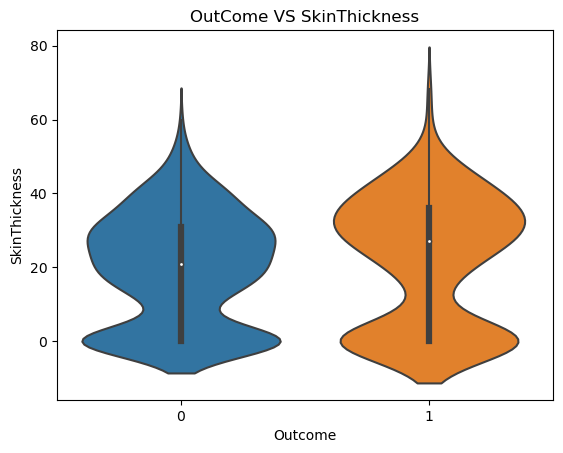

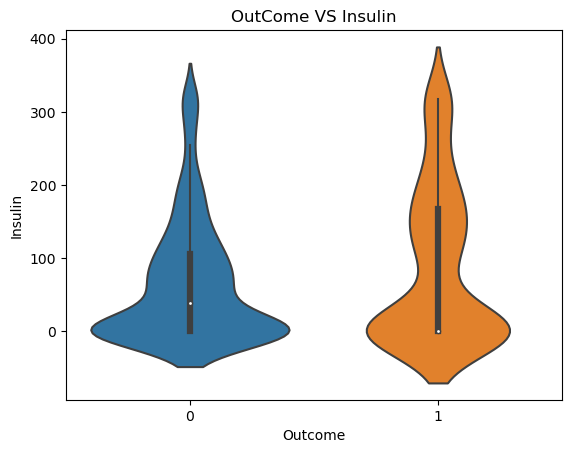

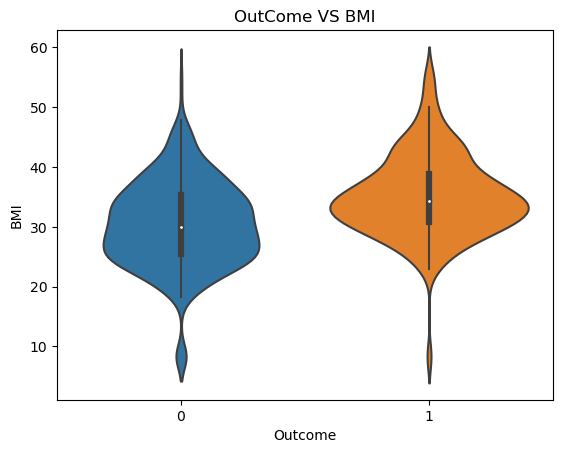

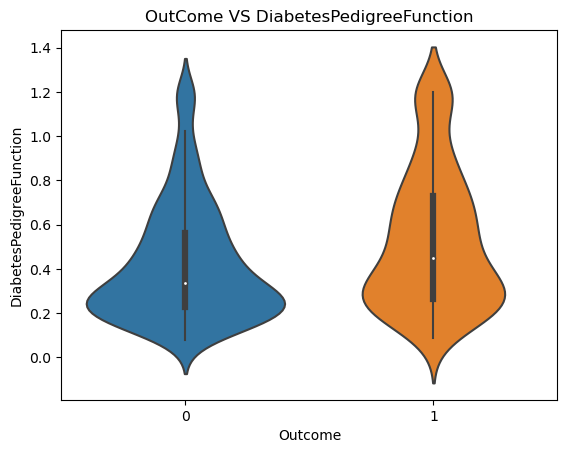

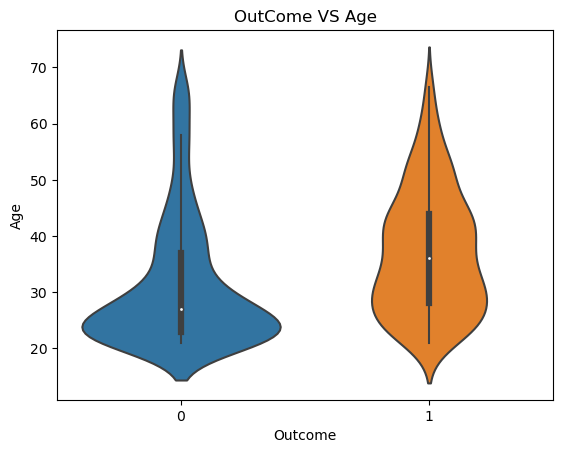

In [21]:
for i in con_col:
    plt.figure()
    sns.violinplot(data = df, x = 'Outcome', y = i)
    #plt.legend()
    plt.title('OutCome VS '+i)

### Feature Selection using Hypothesis Testing

In [42]:
def AnovaResult(inpdata, target,predictor):
    from scipy.stats import f_oneway
    selectcol = []
    
    for i in predictor:
        group = inpdata.groupby(target)[i].apply(list)
        anovaresult = f_oneway(*group)
        
        
        if anovaresult[1]<0.05:
            print(i, 'is correlated with Price | P-Value: ', anovaresult[1])
            selectcol.append(i)
        else:
            print(i, 'is not correlated with Price | P-Value: ', anovaresult[1])
            
    print(selectcol)   
    

In [43]:
AnovaResult(inpdata = df, target = 'Outcome',predictor = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

Pregnancies is correlated with Price | P-Value:  6.082271716733705e-10
Glucose is correlated with Price | P-Value:  1.4608599123474796e-44
BloodPressure is correlated with Price | P-Value:  0.03071284811272285
SkinThickness is correlated with Price | P-Value:  0.045912989638301
Insulin is correlated with Price | P-Value:  0.0005316746318629822
BMI is correlated with Price | P-Value:  6.732505288727856e-18
DiabetesPedigreeFunction is correlated with Price | P-Value:  2.4398529387445747e-07
Age is correlated with Price | P-Value:  9.284604951581896e-12
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## Selected Column after Feature Selection Process

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [4]:
predictor = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [5]:
target = ['Outcome']

In [48]:
DataForML['Outcome'] = df['Outcome']

In [52]:
DataForML.to_pickle('Dataforml_Diabetes.pkl')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('Dataforml_Diabetes.pkl')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


### Devide the columns into two part predictor (X) and target veriable (Y)

In [6]:
X = df[predictor] 

In [7]:
y = df[target]

### Column Transformation

In [8]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
trans = ColumnTransformer(transformers = [
                         ('trans1',FunctionTransformer(func = np.log1p),['Age','Insulin']),
                          ('trans2',FunctionTransformer(func = np.sqrt),['DiabetesPedigreeFunction']),
                          ('trans3',FunctionTransformer(func = np.square),['BloodPressure'])
],remainder = 'passthrough')

In [54]:
X_transform = trans.fit_transform(X)

### Split the X and Y into train & test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.3, random_state = 32)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


### Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [58]:
predictor = MinMaxScaler()

In [59]:
X_train = predictor.fit_transform(X_train)

In [60]:
X_test = predictor.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Model Selection using Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [29]:
LR = LogisticRegression()

In [27]:
param_log = {
    'C':[1,3,5,7],
    'penalty':['l1','l2'],
    'solver':['newton-cg','sag','saga','lbfs','liblinear']
}

In [30]:
GridSearch = GridSearchCV(LR, param_log, cv = 5, n_jobs = 1)

In [31]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [33]:
GridSearch_result.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [34]:
GridSearch_result.best_score_

0.7764797507788163

## Decision Tree

In [35]:
DT = DecisionTreeClassifier()

In [39]:
param_tree = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy']
}

In [40]:
GridSearch = GridSearchCV(DT, param_tree, cv = 5, n_jobs = 1)

In [41]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [42]:
GridSearch_result.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [43]:
GridSearch_result.best_score_

0.7375216337833159

## Random Forest

In [44]:
RF = RandomForestClassifier()

In [45]:
param_RF = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy'],
    'n_estimators':[100,200]
}

In [46]:
GridSearch = GridSearchCV(RF, param_RF, cv = 5, n_jobs = 1)

In [47]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [48]:
GridSearch_result.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [49]:
GridSearch_result.best_score_

0.7671339563862928

## Ada Boost

In [52]:
AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 3))

In [59]:
param_AB = {
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.02,0.04]
}

In [60]:
GridSearch = GridSearchCV(AB, param_AB, cv = 5, n_jobs = 1)

In [61]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [62]:
GridSearch_result.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [63]:
GridSearch_result.best_score_

0.7467116649359639

## XG Boost

In [70]:
XGB = XGBClassifier()

In [1]:
param_xgb = {
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.02,0.04],
    'max_depth':[1,3,5,7],
    'objective':['reg:linear'],
    'booster':['gbtree','gblinear']
}

In [71]:
GridSearch = GridSearchCV(XGB, param_XGB, cv = 5, n_jobs = 1)

In [72]:
GridSearch_result = GridSearch.fit(X_train,y_train)

[13:18:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

In [73]:
GridSearch_result.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 300,
 'objective': 'reg:linear'}

In [74]:
GridSearch_result.best_score_

0.763447559709242

## KNN

In [77]:
KNN = KNeighborsClassifier()

In [78]:
param_knn = {
    'n_neighbors':[1,3,5,7,8]
}

In [79]:
GridSearch = GridSearchCV(KNN, param_knn, cv = 5, n_jobs = 1)

In [80]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [81]:
GridSearch_result.best_params_

{'n_neighbors': 8}

In [82]:
GridSearch_result.best_score_

0.7169608861197646

In [61]:
model = {
    'LogisticRegression':LogisticRegression(C= 1, penalty='l1', solver= 'liblinear'),
    'DecisionTree':DecisionTreeClassifier(criterion= 'gini', max_depth= 3),
    'Random Forest':RandomForestClassifier(criterion= 'gini', max_depth= 3, n_estimators= 100),
    'Ada Boost':AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 3),learning_rate= 0.01, n_estimators= 100),
    'XG Boost':XGBClassifier(booster= 'gbtree',learning_rate= 0.01,max_depth= 6,n_estimators= 300,objective= 'reg:linear'),
    'KNN':KNeighborsClassifier(n_neighbors = 8),
    'SVM':SVC( C= 20, kernel = 'rbf', gamma = 'auto')
}

In [62]:
for i in model:
    print(i)
    
    clf = model[i].fit(X_train,y_train)
    
    prediction = clf.predict(X_test)
    
    
    from sklearn import metrics
    
    print(metrics.classification_report(y_test,prediction))
    confu = metrics.confusion_matrix(y_test,prediction)
    print(confu)
    
    F1_score = metrics.f1_score(y_test, prediction, average = 'weighted')
    print('Accuracy of model testing data : ',round(F1_score,2))
    
    FN = confu[0,1]
    FP = confu[1,0]
    
    Accuracy = 100-(FP+FN)/len(prediction)*100
    print(Accuracy)
    
    from sklearn.model_selection import cross_val_score
    
    Accuracy_Values=cross_val_score(clf, X , y, cv=5, scoring='f1_weighted')
    print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
    print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       147
           1       0.75      0.63      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231

[[129  18]
 [ 31  53]]
Accuracy of model testing data :  0.78
78.78787878787878

Accuracy values for 5-fold Cross Validation:
 [0.7582394  0.75214044 0.72729364 0.81181917 0.74667482]

Final Average Accuracy of the model: 0.76
DecisionTree
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       147
           1       0.68      0.65      0.67        84

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231

[[121  26]
 [ 29  55]]
Accuracy of model testing data :  0.76
76.19047619047619

Accura

In [22]:
import warnings
warnings.filterwarnings('ignore')

## Selected Model is Decision Tree Classifier

### Making Machinelearning Pipeline

In [63]:
trans = ColumnTransformer(transformers = [
                         ('trans1',FunctionTransformer(func = np.log1p),['Age','Insulin']),
                          ('trans2',FunctionTransformer(func = np.sqrt),['DiabetesPedigreeFunction']),
                          ('trans3',FunctionTransformer(func = np.square),['BloodPressure'])
],remainder = 'passthrough')

In [64]:
trans2 = MinMaxScaler()

In [65]:
DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

In [66]:
from sklearn.pipeline import make_pipeline

In [67]:
pipe = make_pipeline(trans,trans2,DT)

In [68]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trans1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Age', 'Insulin']),
                                                 ('trans2',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['DiabetesPedigreeFunction']),
                                                 ('trans3',
                                                  FunctionTransformer(func=<ufunc 'square'>),
                                                  ['BloodPressure'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [69]:
y_pred = pipe.predict(X)

In [74]:
import pickle

pickle.dump(pipe,open('DT_Diabetes.pkl','wb'))

In [79]:
pipe.predict(pd.DataFrame(data = [[18,146,72,35,0,33.6,0.627,50]], columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']))

array([1], dtype=int64)

## Model Deployment

In [1]:
def FinalSelection(InpData):
    
    import pandas as pd
    from sklearn.compose import ColumnTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import OneHotEncoder
    
    ##predictor = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
    
    X = InpData
    
    import pickle
    
    with open('DT_Diabetes.pkl','rb') as readFileStream:
        predicted_model = pickle.load(readFileStream)
        readFileStream.close()
        
        
    prediction = predicted_model.predict(X)    
    
    predictionresult = pd.DataFrame(data = prediction, columns = ['Diabeteas'])
    
    
    return(predictionresult)
    
    

In [3]:
new_data = pd.read_csv("E:\Meri Skill\Project 2-Diabetes\diabetes_test.csv")

In [5]:
FinalSelection(InpData = new_data)

,Diabeteas
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,0
